# MODEL - 1
#### Model based collaborative filtering technique

### Building Product Recommendation system based on previous purchase history & patterns

In [2]:
#Reading data
import pandas as pd
product_data = pd.read_csv("Product_ratings.csv")

In [3]:
print(product_data.head())
product_data.shape

           UserId   ProductId  Rating   Timestamp
0  A39HTATAQ9V7YF  0205616461     5.0  1369699200
1  A3JM6GV9MNOF9X  0558925278     3.0  1355443200
2  A1Z513UWSAAO0F  0558925278     5.0  1404691200
3  A1WMRR494NWEWV  0733001998     4.0  1382572800
4  A3IAAVS479H7M7  0737104473     1.0  1274227200


(2023070, 4)

In [4]:
#Cleaning the data
product_data=product_data.dropna()
product_data.shape

(2023070, 4)

In [5]:
# checking how many ratings does each product has?
product_rating_count = product_data.groupby('ProductId')['Rating'].count()

In [6]:
product_rating_count.head()

ProductId
0205616461    1
0558925278    2
0733001998    1
0737104473    1
0762451459    1
Name: Rating, dtype: int64

In [7]:
popular_products = pd.DataFrame(product_rating_count).sort_values('Rating', ascending=False)
popular_products.head()

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088


<AxesSubplot:xlabel='ProductId'>

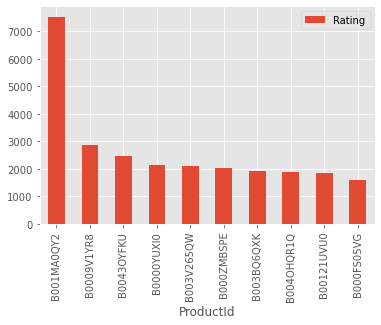

In [8]:
#top 10 products
import matplotlib.pyplot as plt
plt.style.use("ggplot")
popular_products.head(10).plot(kind='bar')

#### we can see that product - B001MA0QY2 has highest reviews

In [9]:
# building model
product_table = product_data[:20000].pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
product_table.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B00005BJ8X,B00005BJ91,B00005BL1R,B00005BLRH,B00005BWXD,B00005CDRP,B00005CDRY,B00005CDS5,B00005CDS7,B00005CDS9
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00473363TJ8YSZ3YAGG9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01437583CZ7V02UKZQ5S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A020135981U0UNEAE4JV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
M = product_table.T
M_d = M
M_d.head()

UserId,A00205921JHJK5X9LNP42,A00473363TJ8YSZ3YAGG9,A01437583CZ7V02UKZQ5S,A020135981U0UNEAE4JV,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A03454732N8VEYJAMGTTH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,...,AZYR51QTD6FAY,AZZ5ENX41WOYZ,AZZ8A0TEQOD7J,AZZDA9BRMPP1B,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# finding the correlation of the matrix 
# Decomposing the matrix

import sklearn
from sklearn.decomposition import TruncatedSVD


Singular_Value_Decomposition = TruncatedSVD(n_components=10)
result = Singular_Value_Decomposition.fit_transform(M)

import numpy as np
Corr_matrix = np.corrcoef(result)
Corr_matrix

array([[ 1.        , -0.4622962 , -0.44299399, ...,  0.43149624,
         0.24065743, -0.87355682],
       [-0.4622962 ,  1.        ,  0.12277912, ...,  0.06879211,
        -0.92540714,  0.34804134],
       [-0.44299399,  0.12277912,  1.        , ..., -0.93759121,
        -0.02565432,  0.64534022],
       ...,
       [ 0.43149624,  0.06879211, -0.93759121, ...,  1.        ,
        -0.17674433, -0.56946772],
       [ 0.24065743, -0.92540714, -0.02565432, ..., -0.17674433,
         1.        , -0.17579328],
       [-0.87355682,  0.34804134,  0.64534022, ..., -0.56946772,
        -0.17579328,  1.        ]])

In [12]:
# choosing a product located at index 45 and checking its correlations
product_id = M.index[45]
print(product_id)
products = list(M.index)
product_ids = products.index(product_id)
corr_result = Corr_matrix[product_ids]
print(corr_result)

1304651118
[ 0.69860588 -0.20958592 -0.90546007 ...  0.87787418  0.08845031
 -0.74533738]


In [13]:
# Finding highly correlated products (corr >= 0.90)
Model_Recommendation = list(M.index[corr_result>= 0.90])
Model_Recommendation.remove(product_id)

In [14]:
print(Model_Recommendation) # for product 1304651118 (index: 45)

['1304139212', '1304139220', '130414643X', '1304146537', '130414674X', '1304168522', '1304174778', '1304174867', '1304174905', '1304196046', '1304196062', '1304196135', '1304482596', '1304482685', '1304488608', '1304495396', '1304511111', '130451112X', '1304511154', '1304622193', '1304622428', '1304622452', '1304622657', '1304622665', '1304624498', '1304651029', '1304651088', '130465110X', '1304651347', '1304665704', '1304665720', '130466578X', '1929099886', '5357956111', '6175005570', '9788071813', '978807278X', '9788075363', '9788078893', '9790771002', '9790771444', '9790773587', '9790775253', '9790778309', '9790781075', '9790782918', '9790782969', '9790785755', '979078953X', '979079052X', '9790790961', '9790791402', '9790799055', '9790801084', 'B000027WL0', 'B000052YPU', 'B000052ZB2', 'B000052ZTY', 'B0000531PJ', 'B0000532QT', 'B00005366Y', 'B00005386R', 'B000056CN5', 'B00005A77D', 'B00005B0AF']


# MODEL - 2
#### Search engine based recommendation system

### Building Product Recommendation system without any purchase history just based on textual clustering for new Customers

In [15]:
descriptions = pd.read_csv('product_descriptions.csv')
descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [16]:
#cleaning the data 
descriptions = descriptions.dropna()
descriptions.shape

(124428, 2)

In [23]:
# feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
v = TfidfVectorizer(stop_words='english')
mat = v.fit_transform(descriptions["product_description"][:1000])
matrix = mat
print(mat)

  (0, 10628)	0.08812354689340532
  (0, 10647)	0.1423590568677299
  (0, 4010)	0.09103799970683017
  (0, 8122)	0.09988767094776674
  (0, 2636)	0.09440248856359806
  (0, 50)	0.1423590568677299
  (0, 10105)	0.1423590568677299
  (0, 11613)	0.1423590568677299
  (0, 5368)	0.0885830580724832
  (0, 69)	0.06794347898821805
  (0, 11797)	0.1423590568677299
  (0, 2831)	0.13350938562679332
  (0, 4428)	0.08555281732266148
  (0, 842)	0.1423590568677299
  (0, 4739)	0.10515126792797397
  (0, 10617)	0.09565002666495798
  (0, 8120)	0.13014489677002541
  (0, 894)	0.11501628385889608
  (0, 9462)	0.1423590568677299
  (0, 9988)	0.10325215980453466
  (0, 6015)	0.051502287773400116
  (0, 2799)	0.1095311014747274
  (0, 510)	0.10418106487729098
  (0, 2807)	0.11501628385889608
  (0, 13102)	0.08767351085006225
  :	:
  (999, 5407)	0.08704379508617123
  (999, 4771)	0.049624028503685705
  (999, 1257)	0.05831012645627923
  (999, 25)	0.08046323580586781
  (999, 11041)	0.09451821278569433
  (999, 8458)	0.0552267347225639

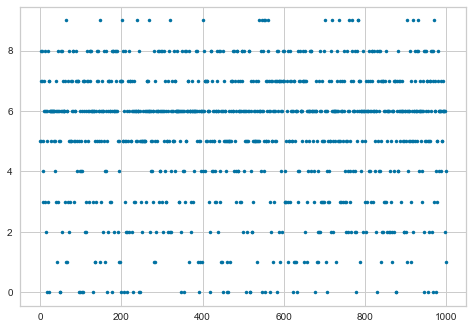

In [27]:
# using kmeans to cluster similar words
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 10, init = 'k-means++')
r= k_means.fit_predict(mat)
plt.plot(r,'.')
plt.show()

In [28]:
# checking clusters
n = 10 # number of clusters
model_2 = KMeans(n_init=1, n_clusters=n, init='k-means++', max_iter=100)
model_2.fit(matrix)

KMeans(max_iter=100, n_clusters=10, n_init=1)

In [44]:
centroids = model.cluster_centers_.argsort()[:, ::-1]
for i in range(n):
    print("Cluster:", i)
    for ind in centroids[i, :10]:
        print(v.get_feature_names()[ind])
    print("----------------------")
    print()

Cluster: 0
brush
ft
panels
bamboo
stake
wood
steel
post
treated
concrete
----------------------

Cluster: 1
primed
65
proposition
nbsp
residents
wood
california
painted
ft
room
----------------------

Cluster: 2
easy
ft
use
design
wall
water
high
post
home
provides
----------------------

Cluster: 3
tile
flooring
installation
residential
ceramic
floor
indoor
use
12
natural
----------------------

Cluster: 4
patio
frame
steel
collection
fabric
rust
furniture
coated
roller
grill
----------------------

Cluster: 5
light
air
watt
fan
bulbs
control
000
ft
cooling
bulb
----------------------

Cluster: 6
door
doors
cabinet
nickel
metal
easy
design
steel
hinges
wood
----------------------

Cluster: 7
cooking
cu
oven
cycle
wash
washer
cycles
options
dryer
clothes
----------------------

Cluster: 8
water
toilet
flush
tank
heater
bowl
valve
gal
performance
hot
----------------------

Cluster: 9
rug
window
vary
slightly
size
order
shades
blind
dimensions
images
----------------------



## Testing The model with search keywords and predicting the cluster

In [99]:
popular_searches=['flower','water bottles','door bell','barbeque grill','led bulb','backpack','chair','gift card','l amazon warehouse',
                 'amazon handmade store']
print("Cluster ID:")
Y = v.transform(popular_searches)
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[2 8 6 4 5 2 1 2 2 2]


# Similarly we can use Insurance searches and based on the searches recommend the personalized insurance offers and policy which helps smoothen up the process and improves customer experience.